In [1]:
from __future__ import annotations

import fridom.shallowwater as sw
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------------------------------
#  Constants
# ----------------------------------------------------------------

RESOLUTION_FACTOR = 9
ROSSBY_NUMBER = 0.1  # advection scale

# ================================================================
#  Setup
# ================================================================

lx = ly = 2 * np.pi
nx = ny = 2**RESOLUTION_FACTOR - 1

# construct grid and modelsettings
grid = sw.grid.cartesian.Grid(N=(nx, ny), L=(lx, ly), periodic_bounds=(True, True))
mset = sw.ModelSettings(grid, f0=1.0, beta=0.0, csqr=1.0, Ro=ROSSBY_NUMBER).setup()

# ================================================================
#  Plot function
# ================================================================

def create_subplot(ax: plt.Axes,  #noqa: PLR0913
                   z: sw.State,
                   label: str,
                   title: str,
                   vmax: float,
                   max_vel: float,
                   cmap: str) -> None:
    """Create a subplot for the given state."""
    # create a plot of the pressure field
    im = z.p.xr.plot(ax=ax, cmap=cmap, vmin=-vmax, vmax=vmax, add_colorbar=False)

    # create a quiver plot of the velocity field
    skip = 2**(RESOLUTION_FACTOR - 5)
    m_vel = (z.u**2 + z.v**2).max().arr.item()**0.5
    q = (z.velocity/m_vel).xrs[::skip, ::skip].plot.quiver(
        "x", "y", "u", "v",
        ax=ax, color="black", scale=30 * max_vel / m_vel, headwidth=6, add_guide=False)

    ax.quiverkey(q, X=0.85, Y=1.08, U=1, label=f"${max_vel:.2g}$", labelpos="E",
                 fontproperties={"size": 13})

    # create a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation="vertical", pad=0.1, shrink=0.8)
    cbar.set_ticks([-vmax, 0, vmax], labels=[f"{-vmax:.2g}", "0", f"{vmax:.2g}"])
    cbar.ax.tick_params(labelsize=15)


    ax.set_aspect("equal")
    ax.set_title(title, fontsize=18)
    ax.set_xticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    ax.set_yticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.text(-0.2, 1.16, label, fontsize=20, fontweight="bold",
            transform=ax.transAxes, va="top", ha="left")

# Jet initial Condition

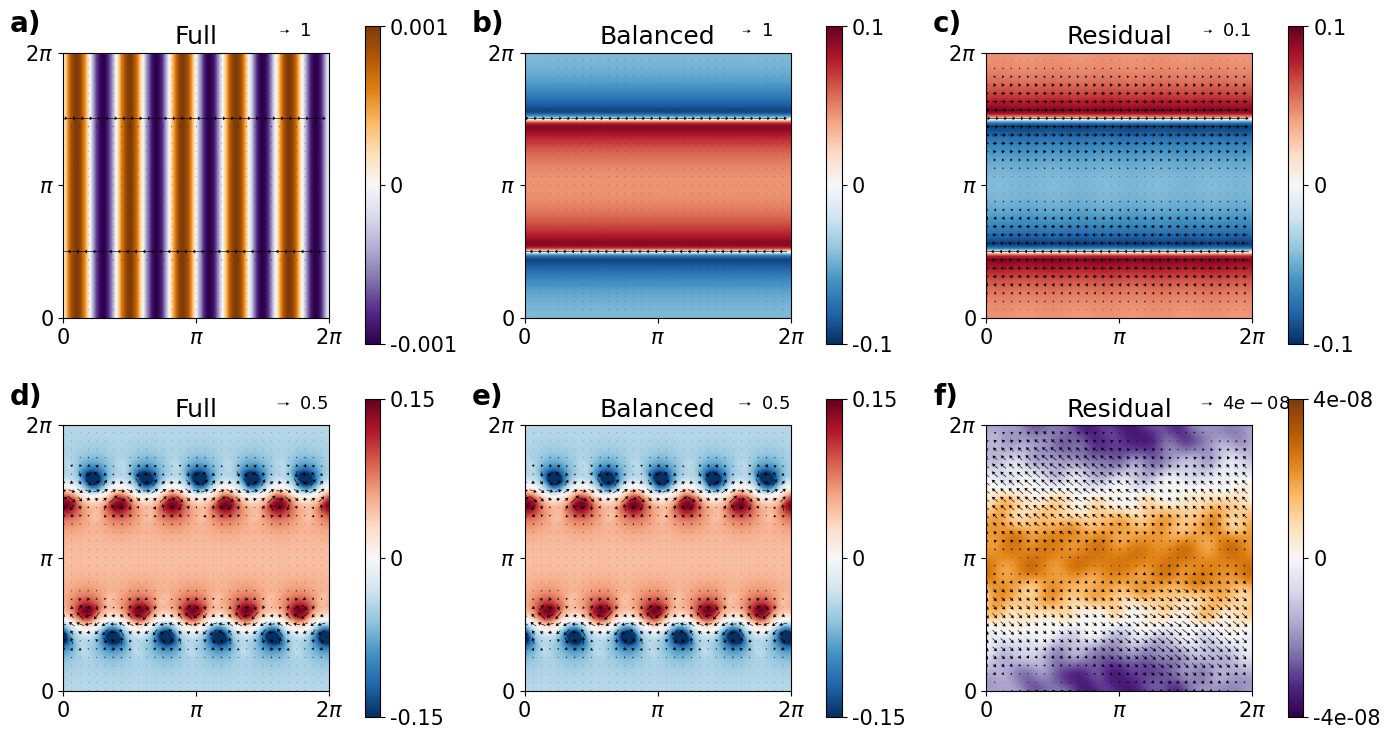

In [2]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8), tight_layout=True)

# load the states
z_ini = sw.State.from_netcdf(mset, "../data/examples/shallow_water_jet/z_ini.nc")
z_ini_bal = sw.State.from_netcdf(mset, "../data/examples/shallow_water_jet/z_ini_bal.nc")
z_ini_res = z_ini - z_ini_bal

z_evo = sw.State.from_netcdf(mset, "../data/examples/shallow_water_jet/z_evo.nc")
z_evo_bal = sw.State.from_netcdf(mset, "../data/examples/shallow_water_jet/z_evo_bal.nc")
z_evo_res = z_evo - z_evo_bal

create_subplot(axs[0, 0], z_ini, "a)", "Full", 1e-3, 1.0, "PuOr_r")
create_subplot(axs[0, 1], z_ini_bal, "b)", "Balanced", 0.1, 1.0, "RdBu_r")
create_subplot(axs[0, 2], z_ini_res, "c)", "Residual", 0.1, 0.1, "RdBu_r")
create_subplot(axs[1, 0], z_evo, "d)", "Full", 0.15, 0.5, "RdBu_r")
create_subplot(axs[1, 1], z_evo_bal, "e)", "Balanced", 0.15, 0.5, "RdBu_r")
create_subplot(axs[1, 2], z_evo_res, "f)", "Residual", 4e-8, 4e-8, "PuOr_r")

plt.savefig("../figures/example_jet_sw.png", dpi=200)

# Random

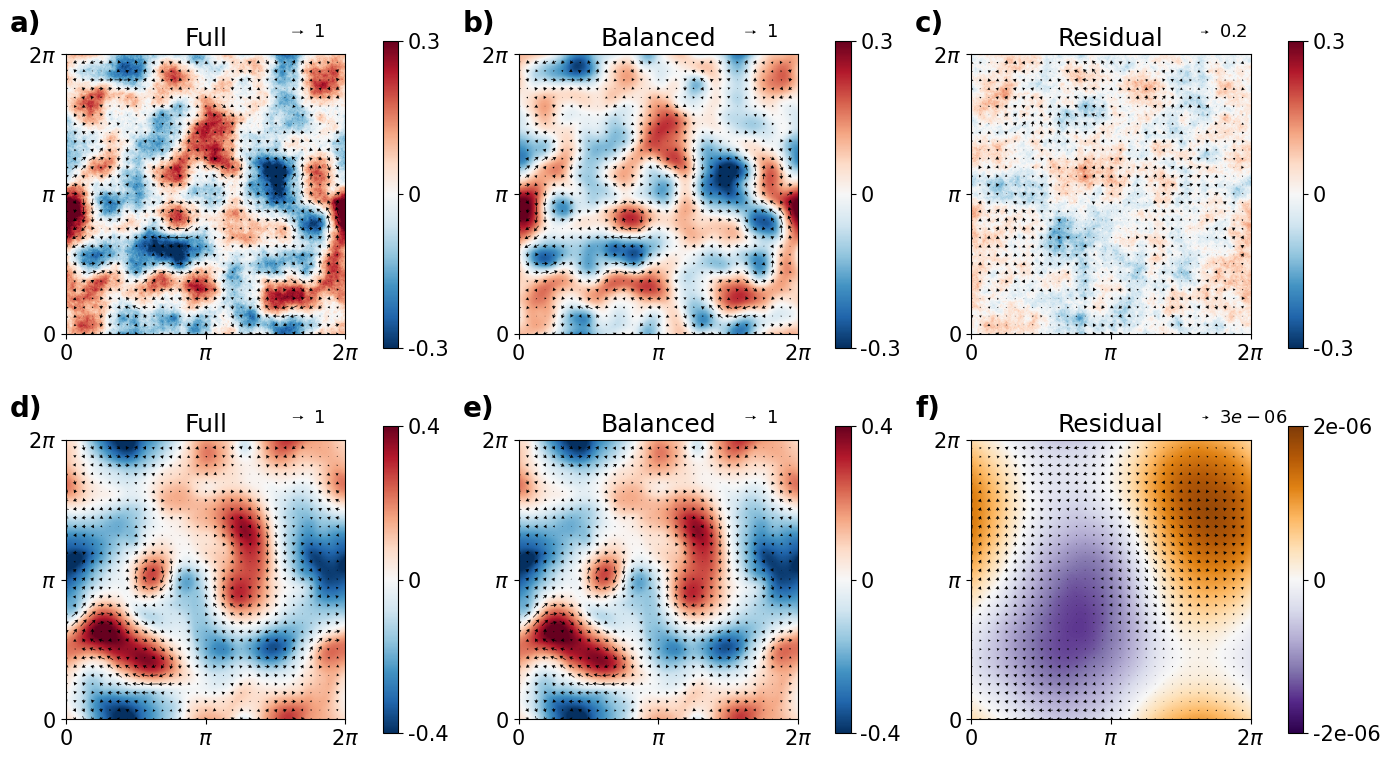

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8), tight_layout=True)

# load the states
z_ini = sw.State.from_netcdf(mset, "../data/examples/shallow_water_random/z_ini.nc")
z_ini_bal = sw.State.from_netcdf(mset, "../data/examples/shallow_water_random/z_ini_bal.nc")
z_ini_res = z_ini - z_ini_bal

z_evo = sw.State.from_netcdf(mset, "../data/examples/shallow_water_random/z_evo.nc")
z_evo_bal = sw.State.from_netcdf(mset, "../data/examples/shallow_water_random/z_evo_bal.nc")
z_evo_res = z_evo - z_evo_bal

create_subplot(axs[0, 0], z_ini, "a)", "Full", 0.3, 1.0, "RdBu_r")
create_subplot(axs[0, 1], z_ini_bal, "b)", "Balanced", 0.3, 1.0, "RdBu_r")
create_subplot(axs[0, 2], z_ini_res, "c)", "Residual", 0.3, 0.2, "RdBu_r")
create_subplot(axs[1, 0], z_evo, "d)", "Full", 0.4, 1.0, "RdBu_r")
create_subplot(axs[1, 1], z_evo_bal, "e)", "Balanced", 0.4, 1.0, "RdBu_r")
create_subplot(axs[1, 2], z_evo_res, "f)", "Residual", 2e-6, 3e-6, "PuOr_r")

plt.savefig("../figures/example_random_sw.png", dpi=200)

# Random with Boundaries

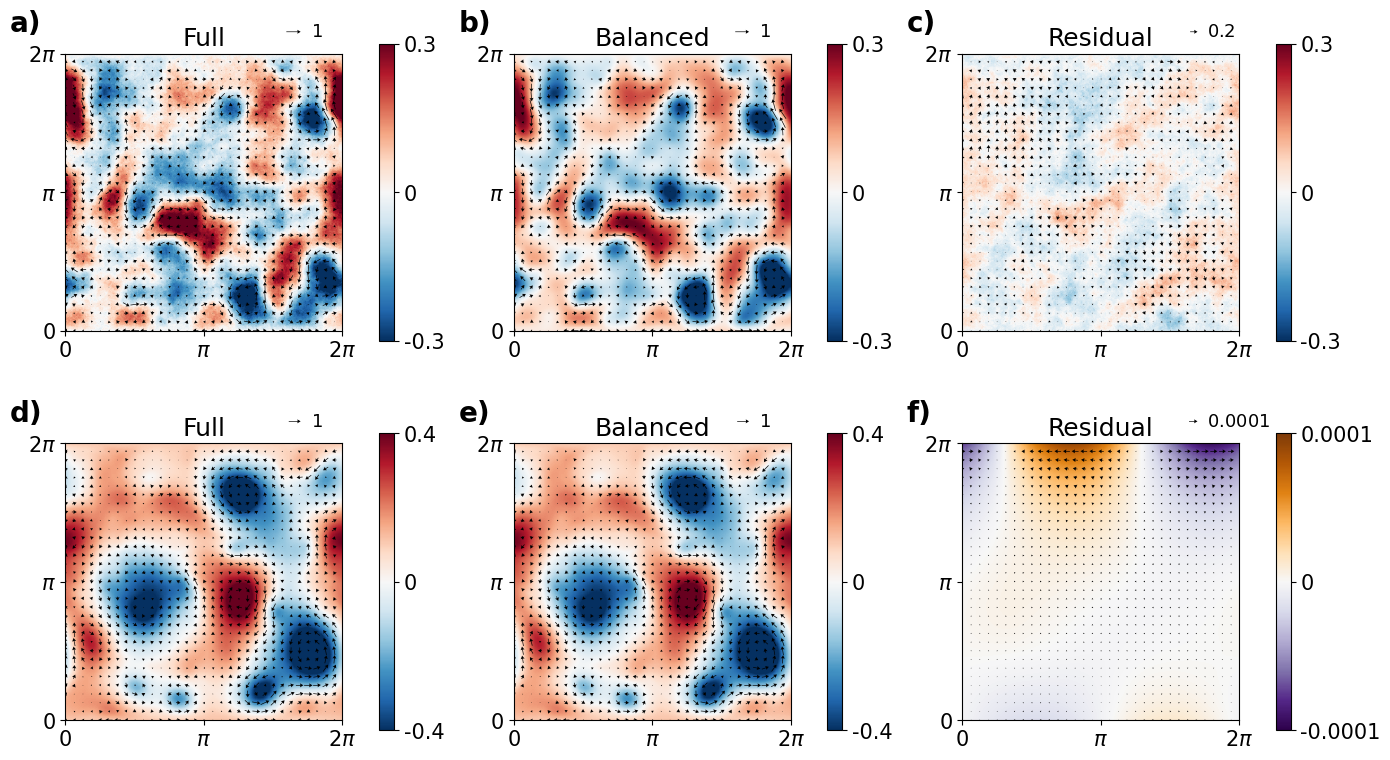

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8), tight_layout=True)

# load the states
z_ini = sw.State.from_netcdf(mset, "../data/examples/shallow_water_random_bound/z_ini.nc")
z_ini_bal = sw.State.from_netcdf(mset, "../data/examples/shallow_water_random_bound/z_ini_bal.nc")
z_ini_res = z_ini - z_ini_bal

z_evo = sw.State.from_netcdf(mset, "../data/examples/shallow_water_random_bound/z_evo.nc")
z_evo_bal = sw.State.from_netcdf(mset, "../data/examples/shallow_water_random_bound/z_evo_bal.nc")
z_evo_res = z_evo - z_evo_bal

create_subplot(axs[0, 0], z_ini, "a)", "Full", 0.3, 1.0, "RdBu_r")
create_subplot(axs[0, 1], z_ini_bal, "b)", "Balanced", 0.3, 1.0, "RdBu_r")
create_subplot(axs[0, 2], z_ini_res, "c)", "Residual", 0.3, 0.2, "RdBu_r")
create_subplot(axs[1, 0], z_evo, "d)", "Full", 0.4, 1.0, "RdBu_r")
create_subplot(axs[1, 1], z_evo_bal, "e)", "Balanced", 0.4, 1.0, "RdBu_r")
create_subplot(axs[1, 2], z_evo_res, "f)", "Residual", 1e-4, 1e-4, "PuOr_r")

# plt.savefig("../figures/example_random_sw.png", dpi=200)